<a href="https://colab.research.google.com/github/EliasSf73/test_/blob/master/LinearRegressionStatML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IE343 -- Statistical Machine Learning and Its Applications
## Lab 2: Linear regression
- [1. Simple Linear Regression](#1.-Simple-Linear-Regression)
- [2. Multiple Linear Regression](#2.-Multiple-Linear-Regression)
- [3. Interaction Terms](#3.-Interaction-Terms)
- [4. Non-linear Transformations of Predictors](#4.-Non-linear-Transformations-of-Predictors)
- [5. Qualitative Predictors](#5.-Qualitative-Predictors)
- [6. Optimization Methods for Linear Regression](#6.-Optimization-Methods-for-Linear-Regression)

# 1. Simple Linear Regression

- Linear regression is a simple approach to supervised learning. It assumes that there is approximately a linear relationship between $X$ and $y$
$\begin{aligned} y & \approx \beta_{0}+\beta_{1} X \\ \text { sales } & \approx \beta_{0}+\beta_{1} \times \mathrm{TV} \end{aligned}$
    - $X, y$ are observed values
    - $\beta_0$ (intercept) and $\beta_1$ (slope) are two unknown parameters that should be estimated from training data
- Residual Sum of Squares (RSS) = $\sum_{i=1}^{n}\left(y_{i}-\left({\beta_{0}}+{\beta_{1}} X_{i}\right)\right)^{2}$ <-- Ordinary Least Square (OLS)
- **Our goal is to minimize RSS with respect to the unknown parameters $\beta_0$ and $\beta_1$**

In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import seaborn as sns
import pandas as pd

pd.set_option('display.precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', '{:20,.2f}'.format) # get rid of scientific notation

## Boston Housing Dataset

The Boston data frame has 506 rows and 14 columns.

````crim````: per capita crime rate by town.

````zn````: proportion of residential land zoned for lots over 25,000 sq.ft.

````indus````: proportion of non-retail business acres per town.

````chas````: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

````nox````: nitrogen oxides concentration (parts per 10 million).

````rm````: average number of rooms per dwelling.

````age````: proportion of owner-occupied units built prior to 1940.

````dis````: weighted mean of distances to five Boston employment centres.

````rad````: index of accessibility to radial highways.

````tax````: full-value property-tax rate per \$10,000.

````ptratio````: pupil-teacher ratio by town.

````black````: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

````lstat````: lower status of the population (percent).

````medv````: median value of owner-occupied homes in \$1000s.

## Goal: Predict ````medv```` (response) using ````lstat```` (predictor)

In [2]:
# load data
boston = pd.read_csv('Boston.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273.00,21.00,393.45,6.48,22.00


### 1.1.1. Drawing a plot with matplotlib

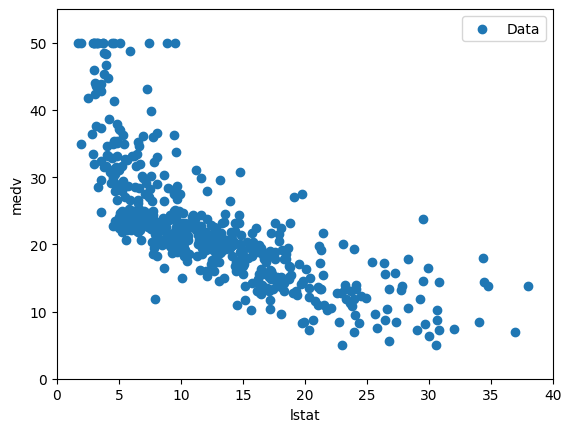

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(boston.lstat.values, boston.medv.values, label='Data');
ax.set_xlabel("lstat");
ax.set_ylabel("medv");
ax.legend();
plt.xlim(0, 40);
plt.ylim(0, 55);

### 1.1.2. Drawing the same plot by using the "plot" funtionality of Pandas

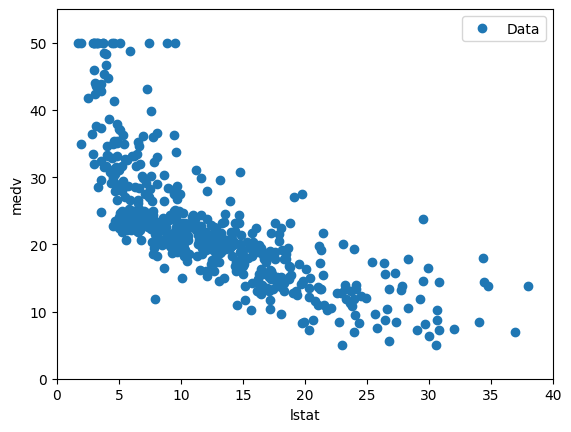

In [4]:
fig, ax = plt.subplots()
boston.plot(x="lstat", y="medv", style="o", ax=ax)
ax.set_ylabel("medv");
ax.legend(['Data']);
plt.xlim(0, 40);
plt.ylim(0, 55);

### 1.2. Simple Linear Regression using scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression

# LR model with intercept
LR_sklearn = LinearRegression(fit_intercept=True)

X_train = boston['lstat'].values.reshape(-1, 1) # Input (X)
y_train = boston['medv'].values # Ground Truth (y)
LR_sklearn.fit(X_train, y_train)
('intercept:', LR_sklearn.intercept_, 'coefficient:',LR_sklearn.coef_)

('intercept:', 34.5538408793831, 'coefficient:', array([-0.95004935]))

### 1.3. Let's check how well our model performed.

In [12]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

y_train = boston['medv'].values # Ground Truth
y_pred = LR_sklearn.predict(boston['lstat'].values.reshape(-1, 1))

print("R^2: {:.4f}".format(r2_score(y_train, y_pred)))
print("Mean Squared Error (MSE): {:.4f}".format(mean_squared_error(y_train, y_pred)))

R^2: 0.5441
Mean Squared Error (MSE): 38.4830


### 1.4. Drawing the regression line on top of the scatterplot

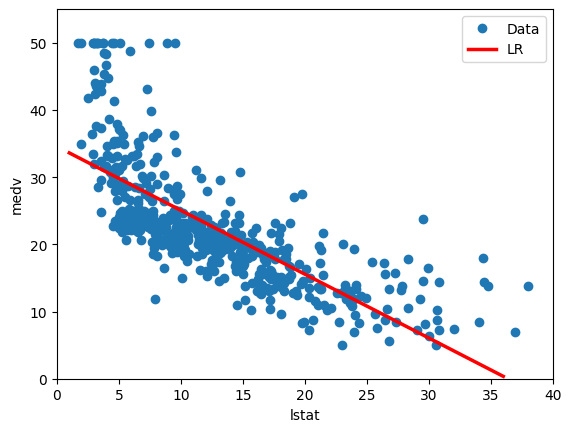

In [13]:
fig, ax = plt.subplots()
boston.plot(x="lstat", y="medv", style="o", ax=ax) # plot using pandas
ax.set_ylabel("medv")
xs = range(int(np.min(X_train[:,0])), int(np.max(X_train[:,0])))
xs = np.array(xs).reshape(-1,1)
ys = LR_sklearn.predict(xs)
ax.plot(xs, ys, 'r', linewidth=2.5);
ax.legend(['Data',"LR"]);
plt.xlim(0, 40);
plt.ylim(0, 55);

### 1.5. Simple Linear Regression using statsmodels

In [14]:
import statsmodels.api as sm

X_train = boston['lstat'].values.reshape(-1, 1)
y_train = boston['medv'].values

# Equivalent to "fit_intercept=True" of scikit-learn
ols_sm = sm.OLS(y_train, sm.add_constant(X_train))
ols_sm_results = ols_sm.fit()
print(ols_sm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           5.08e-88
Time:                        12:56:05   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

### 1.6.1. Drawing the regression line on top of the scatterplot (Using matplotlib and statsmodels)

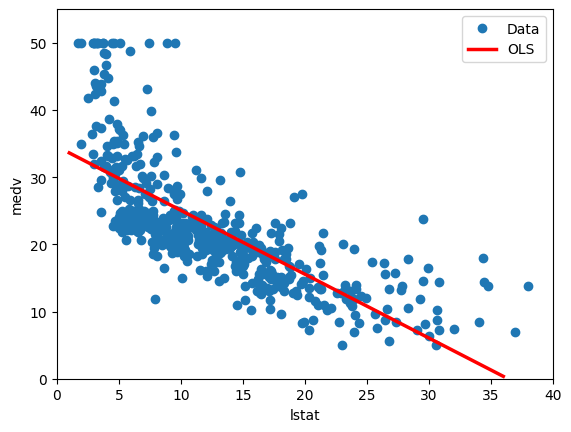

In [15]:
fig, ax = plt.subplots()
boston.plot(x="lstat", y="medv", style="o", ax=ax)
ax.set_ylabel("medv")
xs = range(int(np.min(X_train[:,0])), int(np.max(X_train[:,0])))
xs = np.array(xs).reshape(-1, 1)
ys = ols_sm_results.predict(sm.add_constant(xs))
ax.plot(xs, ys, 'r', linewidth=2.5);
ax.legend(['Data',"OLS"]);
plt.xlim(0, 40);
plt.ylim(0, 55);

### 1.6.2. Drawing the regression line on top of the scatterplot (Using Seaborn)

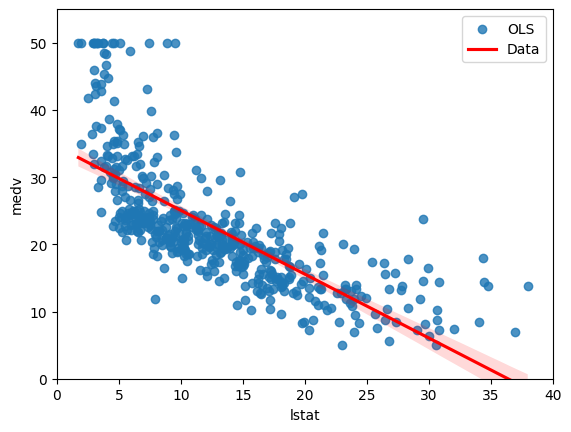

In [16]:
fig, ax = plt.subplots()
sns.regplot(x='lstat', y='medv', data=boston,line_kws={"color": "red"}, ci=95, ax=ax);
ax.set(xlim=(0, None));
ax.legend(['OLS',"Data"]);
plt.xlim(0, 40);
plt.ylim(0, 55);

# 2. Multiple Linear Regression

Residual Sum of Squares (RSS) $=\sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} X_{i 1} \ldots-\beta_{p} X_{i p}\right)^{2}=\sum_{i=1}^{n}\left(y_{i}-X_{i} \boldsymbol{\beta}\right)^{2}$  <-- Ordinary Least Square (OLS)

### 2.1. Multiple Linear Regression using scikit-learn

In [17]:
# regression with 2 input columns
X_train = boston[["lstat", "age"]]
y_true = boston['medv']
ols_sklearn_2 = LinearRegression()
ols_sklearn_2.fit(X_train, y_true)
(ols_sklearn_2.intercept_, ols_sklearn_2.coef_)

(33.2227605317929, array([-1.03206856,  0.03454434]))

In [18]:
# regression using all input columns
xcols = boston.columns[:-1] # Last column is the label column
X_train = boston[xcols]
y_true = boston['medv']
ols_sklearn_3 = LinearRegression()
ols_sklearn_3.fit(X_train, y_true)
(ols_sklearn_3.intercept_, ols_sklearn_3.coef_)

(36.459488385089955,
 array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]))

### 2.2. Multiple Linear Regression using statsmodels

In [19]:
# regression with 2 input columns
X_train = boston[['lstat', 'age']]
y_true = boston['medv']

ols_sm_2 = sm.OLS(y_true, sm.add_constant(X_train))
ols_sm_2_results = ols_sm_2.fit()
print(ols_sm_2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           2.98e-88
Time:                        13:00:47   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

In [20]:
# regression using all input columns
xcols = boston.columns[:-1]
X_train = boston[xcols]
y_true = boston['medv']
ols_sm = sm.OLS(y_true, sm.add_constant(X_train))
ols_sm_results = ols_sm.fit()
print(ols_sm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          6.72e-135
Time:                        13:00:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

# 3. Interaction Terms

<Figure size 640x480 with 0 Axes>

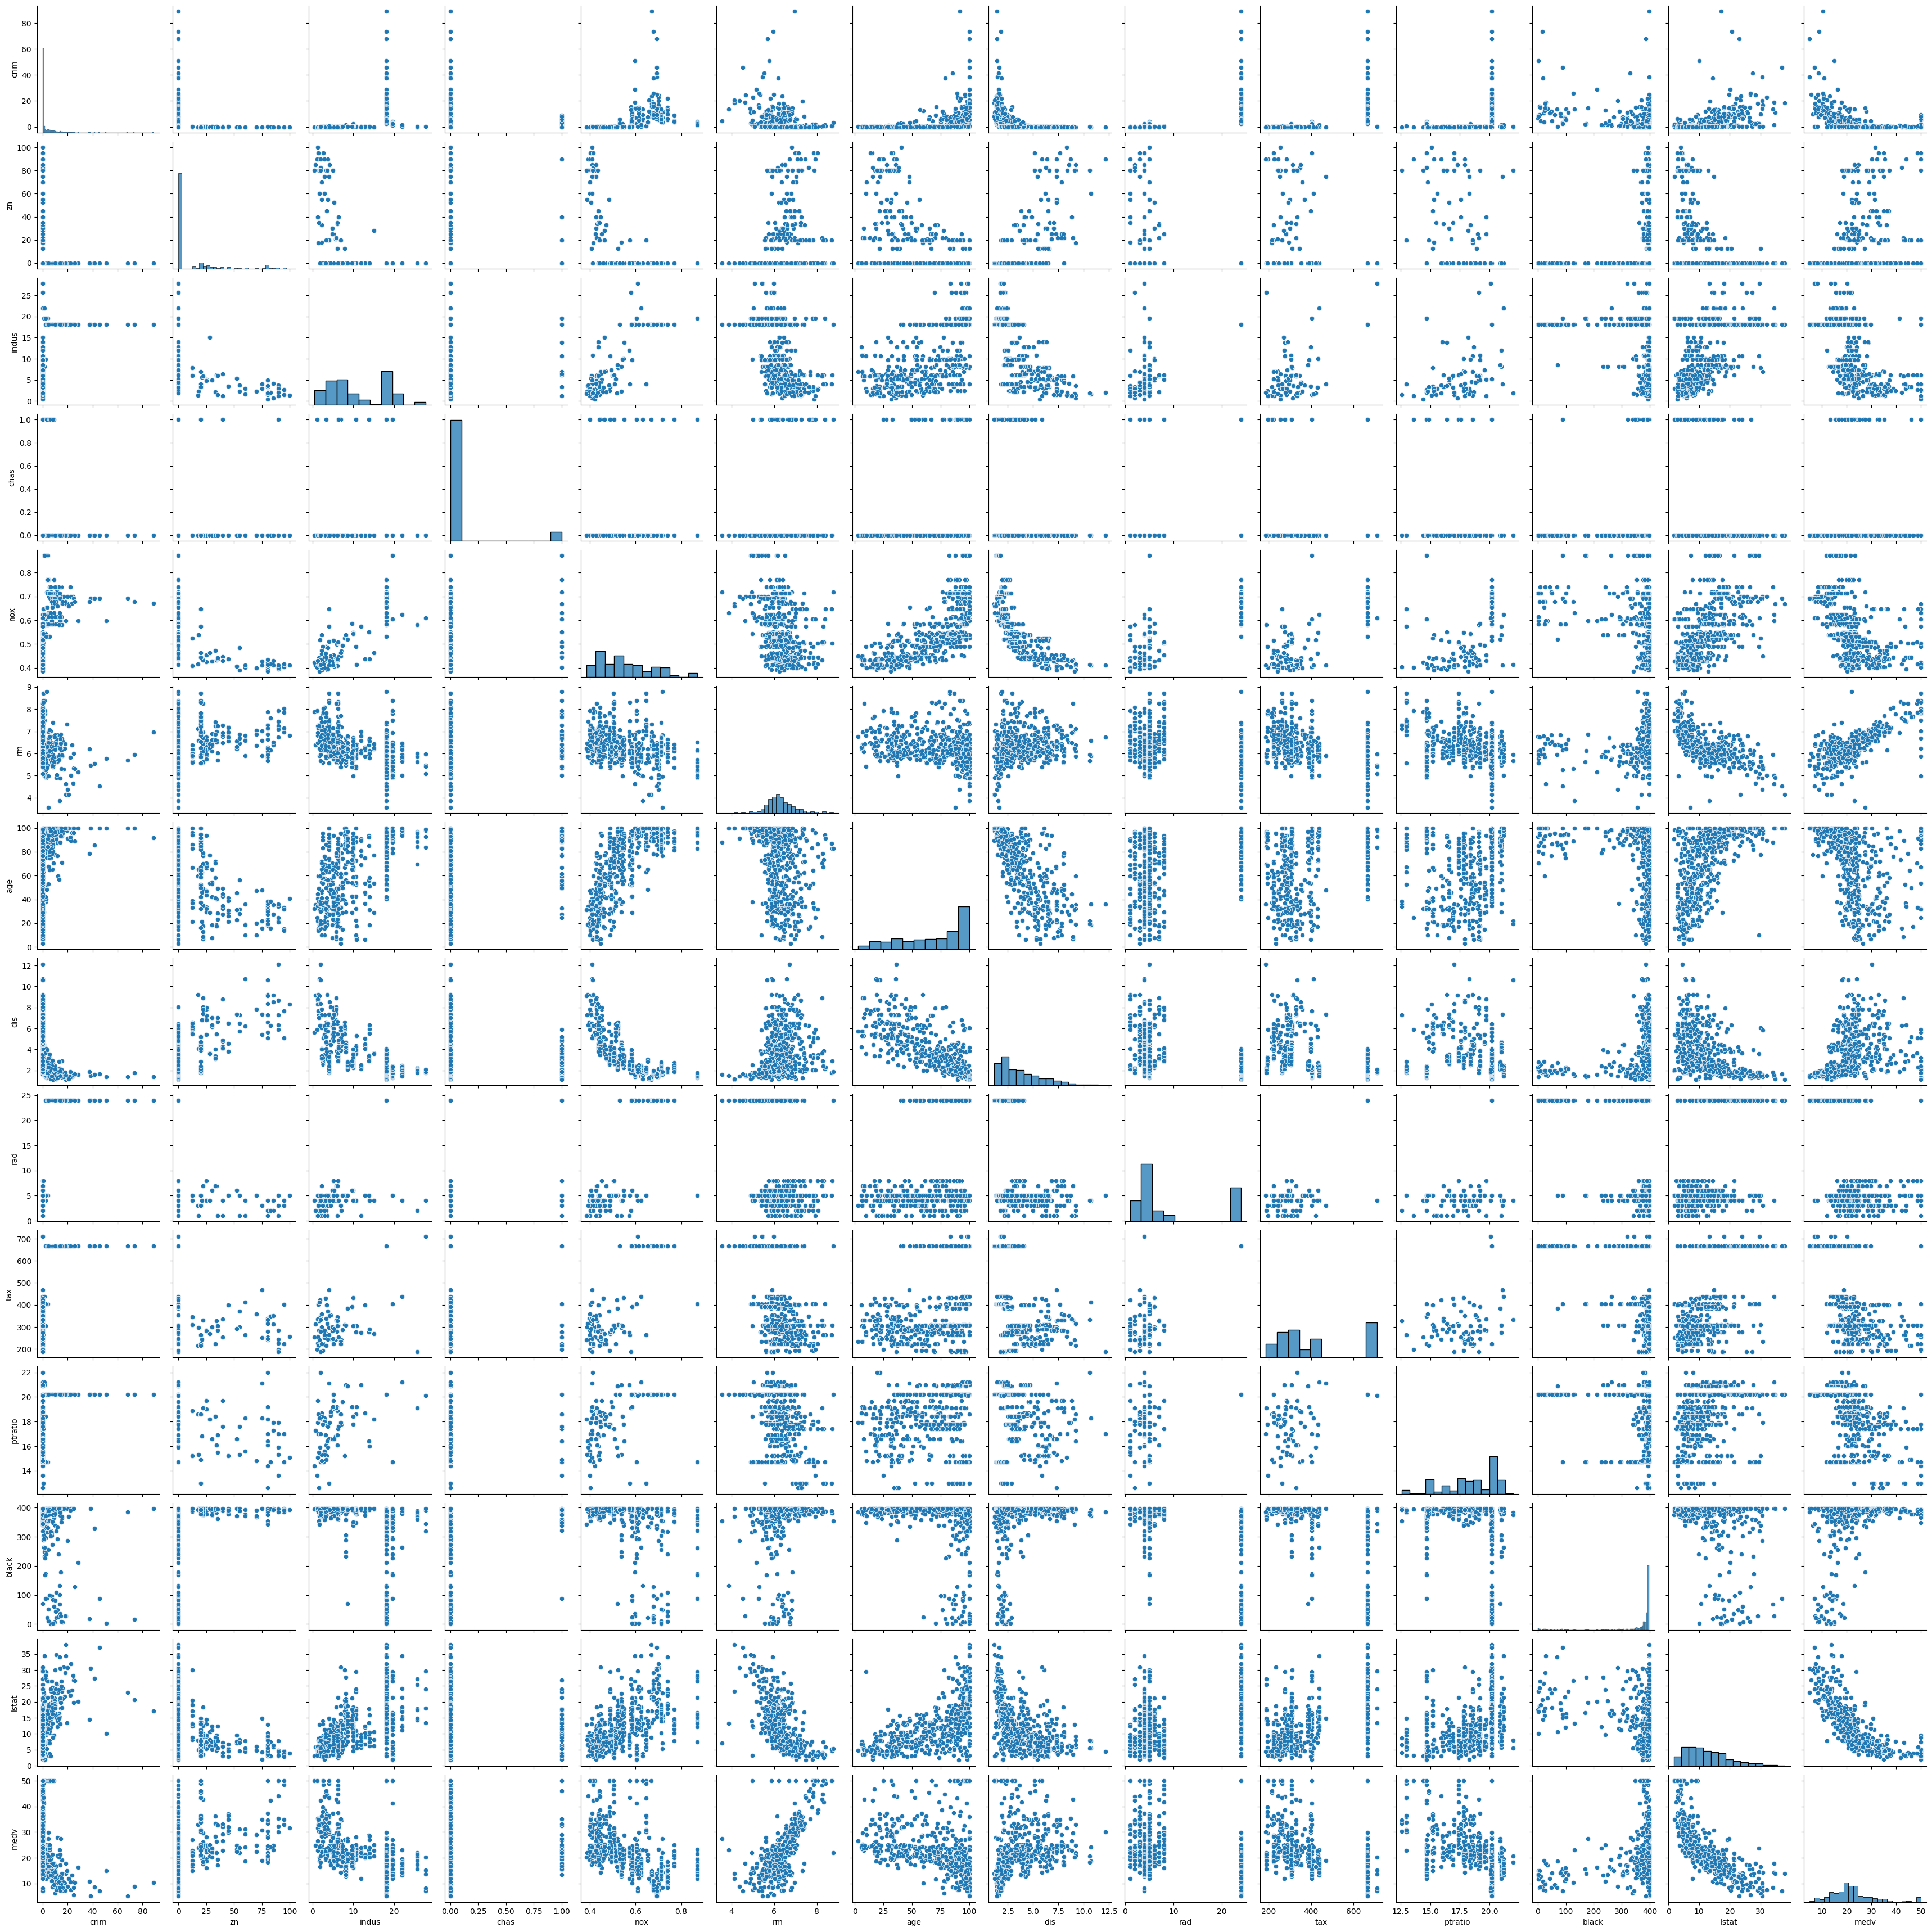

In [21]:
plt.figure();
sns.pairplot(boston);
plt.show();

In [23]:
ols_sm = sm.formula.ols(formula='medv ~ lstat * age', data=boston)
ols_sm_results = ols_sm.fit()
print(ols_sm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           4.86e-88
Time:                        13:05:08   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

# 4. Non-linear Transformations of Predictors

### 4.1.1. 2nd order polynimial: $y=\beta_0+\beta_1X+\beta_2X^2$

In [24]:
ols_sm = sm.formula.ols(formula='medv ~ lstat + np.power(lstat, 2)', data=boston)
ols_sm_results = ols_sm.fit()
print(ols_sm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.56e-112
Time:                        13:05:11   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0

### 4.1.2. 5th order polynimial: $y=\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\beta_4X^4+\beta_5X^5$

In [25]:
ols_sm = sm.formula.ols(formula='medv ~ lstat + np.power(lstat, 2) + np.power(lstat, 3) + np.power(lstat, 4) + np.power(lstat, 5)', data=boston)
ols_sm_results = ols_sm.fit()
print(ols_sm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          8.73e-122
Time:                        13:09:15   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3

### 4.2. Drawing various polynimial regression fits in separate figures

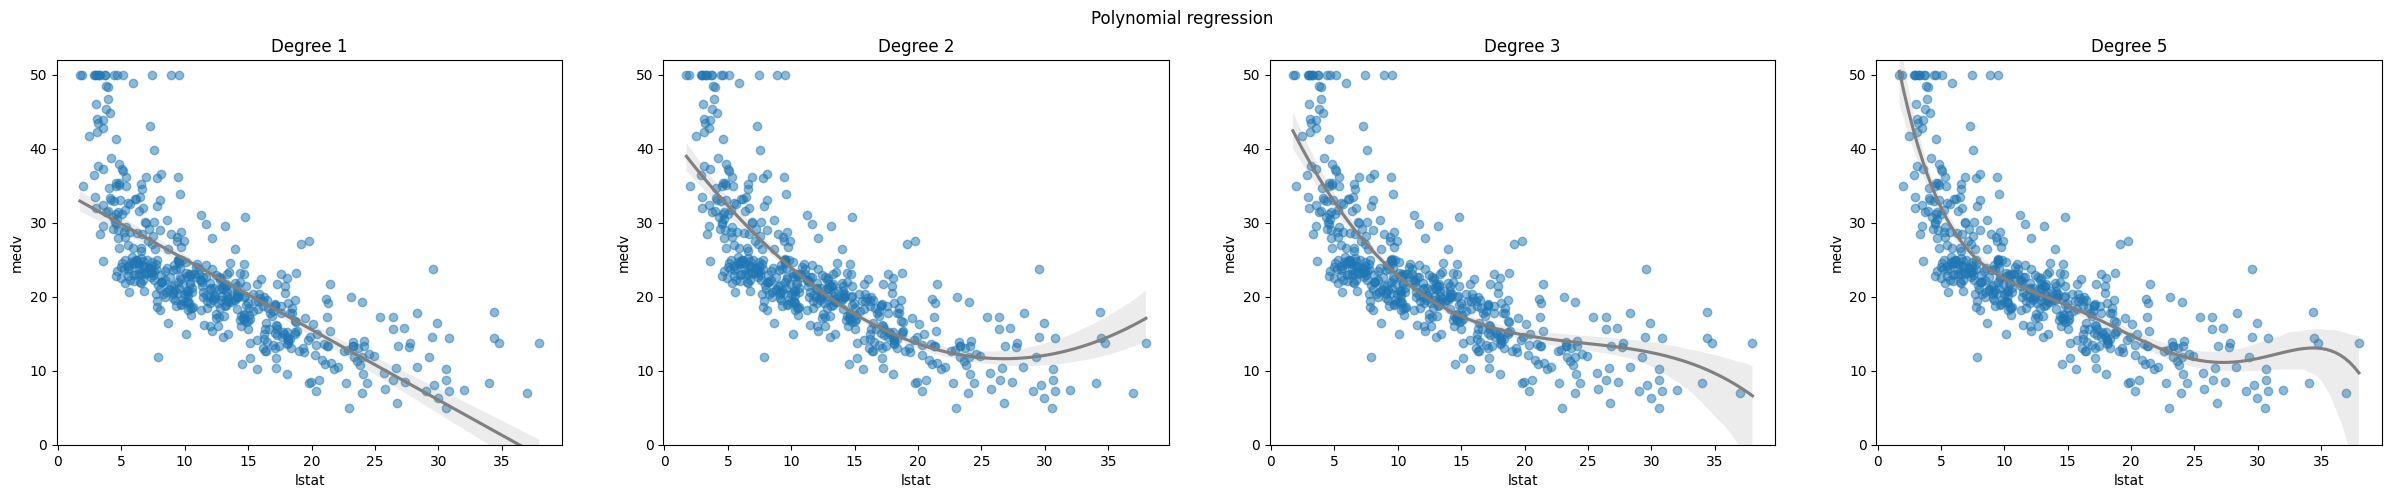

In [26]:
f, axes = plt.subplots(1, 4, sharex=False, sharey=False)
f.set_figheight(5)
f.set_figwidth(30)
sns.regplot(x='lstat', y='medv', data=boston, ax=axes[0], order=1, line_kws={'color': 'gray'}, scatter_kws={'alpha': 0.5})
sns.regplot(x='lstat', y='medv', data=boston, ax=axes[1], order=2, line_kws={'color': 'gray'}, scatter_kws={'alpha': 0.5})
sns.regplot(x='lstat', y='medv', data=boston, ax=axes[2], order=3, line_kws={'color': 'gray'}, scatter_kws={'alpha': 0.5})
sns.regplot(x='lstat', y='medv', data=boston, ax=axes[3], order=5, line_kws={'color': 'gray'}, scatter_kws={'alpha': 0.5})
f.suptitle("Polynomial regression")
axes[0].set_ylim(0,52)
axes[0].set_title("Degree 1")
axes[1].set_ylim(0,52)
axes[1].set_title("Degree 2")
axes[2].set_ylim(0,52)
axes[2].set_title("Degree 3")
axes[3].set_ylim(0,52)
axes[3].set_title("Degree 5");

### 4.3. Drawing various polynimial regression fits in a single figure

(0.0, 52.0)

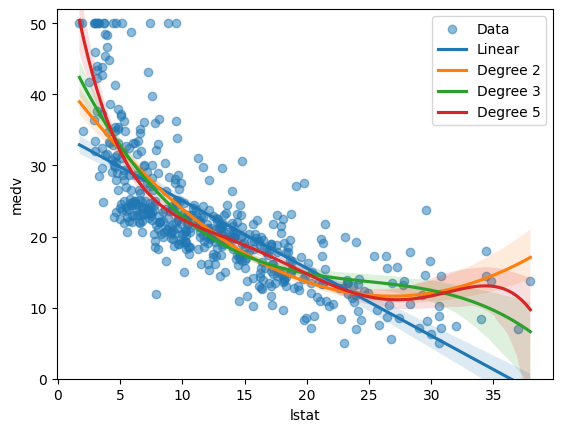

In [27]:
# All in a single plot
f, ax = plt.subplots()
ax.scatter(boston.lstat.values, boston.medv.values, label='Data', alpha=0.5);
sns.regplot(x='lstat', y='medv', data=boston, order=1, scatter=False, label='Linear', ax=ax)
sns.regplot(x='lstat', y='medv', data=boston, order=2, scatter=False, label='Degree 2', ax=ax)
sns.regplot(x='lstat', y='medv', data=boston, order=3, scatter=False, label='Degree 3', ax=ax)
sns.regplot(x='lstat', y='medv', data=boston, order=5, scatter=False, label='Degree 5', ax=ax)
plt.legend()
ax.set_ylim(0,52)

# 5. Qualitative Predictors

### 5.1 Load data

In [30]:
carseats = pd.read_csv('Carseats.csv')
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### 5.2 Construct the formula with two interaction terms

In [31]:
formula ='Sales ~' + '+'.join(list(carseats.iloc[:,1:].columns.tolist()) + ['Income:Advertising'] + ['Price:Age'])
formula

'Sales ~CompPrice+Income+Advertising+Population+Price+ShelveLoc+Age+Education+Urban+US+Income:Advertising+Price:Age'

### 5.3 Fit the model (Using statsmodel)

In [32]:
ols_smf = sm.formula.ols(formula=formula, data=carseats)
ols_smf_results = ols_smf.fit()
print(ols_smf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          6.14e-166
Time:                        13:15:36   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756    

# 6. Optimization Methods for Linear Regression

- 6.1 Direct Approach
- 6.2 Iterative Approach
    - 6.2.1. Gradient descent
    - 6.2.2 Stochastic gradient descent

#### Recall the objective function for linear regression

$J(\boldsymbol{\beta})=\sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} X_{i 1} \ldots-\beta_{p} X_{i p}\right)^{2}=\sum_{i=1}^{n}\left(y_{i}-X_{i} \boldsymbol{\beta}\right)^{2}=\Vert \boldsymbol{y}-\boldsymbol{X} \boldsymbol{\beta}\Vert^2$
### 6.1 Direct approach

$\begin{aligned} \frac{\partial\|\boldsymbol{y}-\boldsymbol{X} \boldsymbol{\beta}\|^{2}}{\partial \boldsymbol{\beta}} &=\mathbf{0}=-2 \boldsymbol{X}^{\boldsymbol{T}}(\boldsymbol{y}-\boldsymbol{X} \boldsymbol{\beta}) \\ & \Rightarrow \quad \boldsymbol{X}^{\boldsymbol{T}}(\boldsymbol{y}-\boldsymbol{X} \boldsymbol{\beta})=\mathbf{0} \\ & \Rightarrow \quad \boldsymbol{X}^{\boldsymbol{T}} \boldsymbol{X} \boldsymbol{\beta}=\boldsymbol{X}^{\boldsymbol{T}} \boldsymbol{y} \\ & \Rightarrow \hat{\boldsymbol{\beta}}=\left(\boldsymbol{X}^{\boldsymbol{T}} \boldsymbol{X}\right)^{-1} \boldsymbol{X}^{T} \boldsymbol{y} \end{aligned}$

In [33]:
from numpy.linalg import inv
# load data
boston = pd.read_csv('Boston.csv')
# regression using 2 columns
X_train = boston["lstat"].values
X_train = sm.add_constant(X_train)
y_true = boston['medv'].values

beta_direct = inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_true)
print(beta_direct)

[34.55384088 -0.95004935]


### 6.1.1 Compare with the one using statmodels

In [34]:
X_train = boston['lstat']
y_true = boston['medv']

ols_sm_2 = sm.OLS(y_true, sm.add_constant(X_train))
ols_sm_2_results = ols_sm_2.fit()
print(ols_sm_2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           5.08e-88
Time:                        13:27:50   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

### 6.2 Iterative Approach

<div>
<img src="figures/comparison.png" width="500"/>
</div>

### 6.2.1 Gradient Descent

- Element-wise representation
    - $\frac{\partial J(\boldsymbol{\beta})}{\partial \beta_{j}}=\frac{1}{n} \sum_{i=1}^{n}\left(X_{i} \boldsymbol{\beta}-y_{i}\right) X_{i j}$
- Vector representation
    - $\frac{\partial J(\boldsymbol{\beta})}{\partial \beta}=\frac{1}{n}X^T(X\beta-y)$

<div>
<img src="figures/gd.png" width="300"/>
</div>

In [35]:
import statsmodels.api as sm

# load data
boston = pd.read_csv('Boston.csv')
# regression using all input columns
X_train = boston[["lstat"]].values
X_train = sm.add_constant(X_train)
y_train = boston['medv'].values

Learned parameters through GD: [34.27863697 -0.93352688]
Directly learned parameters: [34.55384088 -0.95004935]


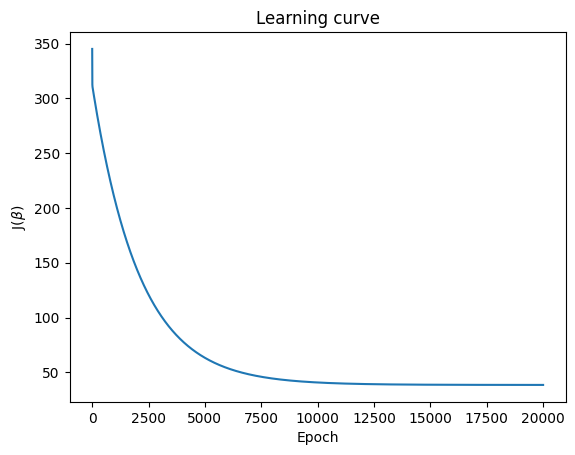

In [36]:
beta = np.random.rand(2)
alpha = 0.001  # The learning Rate
epochs = 20000  # The number of iterations to perform gradient descent
n = float(len(X_train)) # Number of elements in X

cost = []
# Performing gradient descent
for epoch in range(epochs):
    y_pred = np.dot(X_train, beta)
    error = y_pred - y_train
    dbeta = (1/n) * np.dot(X_train.T, error)
    beta = beta - alpha * dbeta

    J = (1/n) * np.dot(error.T, error)
    cost.append(J)

print("Learned parameters through GD: {}".format(beta))
print("Directly learned parameters: {}".format(beta_direct))
plt.plot(np.arange(epochs), cost)
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel(r"J($\beta$)");

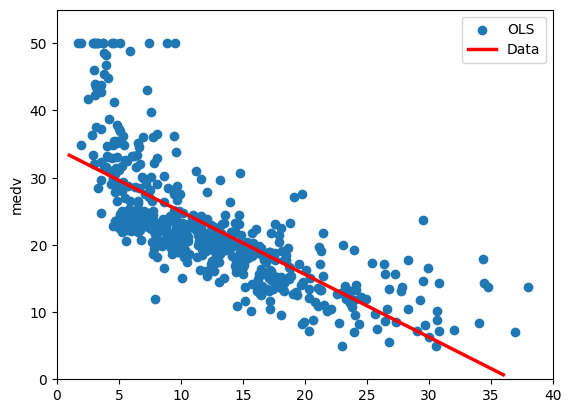

In [37]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,1],y_true)
ax.set_ylabel("medv")
xs = range(int(np.min(X_train[:,1])), int(np.max(X_train[:,1])))
xs = np.array(xs)
xs = sm.add_constant(xs)
ys = np.dot(xs, beta)
ax.plot(xs[:,1], ys, 'r', linewidth=2.5);
ax.legend(["OLS","Data"]);
plt.xlim(0, 40);
plt.ylim(0, 55);

### 6.2.2 Stochastic Gradient Descent

- Element-wise representation
    - $\frac{\partial J^{(i)}(\boldsymbol{\beta})}{\partial \beta_{j}}=\left(X_{i} \boldsymbol{\beta}-y_{i}\right) X_{i j}$
- Vector representation
    - $\frac{\partial J^{(i)}(\boldsymbol{\beta})}{\partial \beta}=X_i^T(X_i\beta-y)$

<div>
<img src="figures/sgd.png" width="300"/>
</div>

Learned parameters through SGD: [35.88635157 -1.35158632]
Directly learned parameters: [34.55384088 -0.95004935]


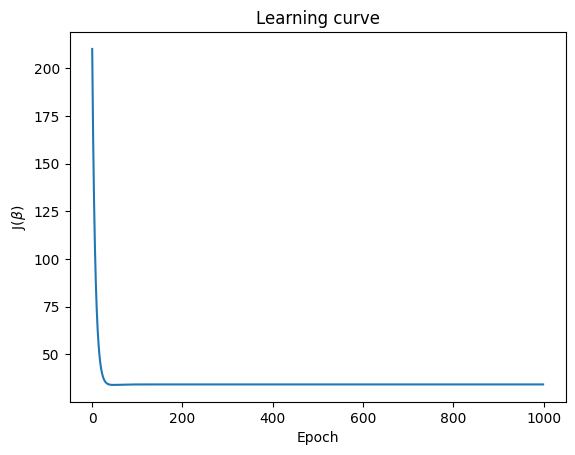

In [38]:
beta = np.random.rand(2)
alpha = 0.001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
n = float(len(X_train)) # Number of elements in X

cost = []
# Performing stochastic gradient descent
for epoch in range(epochs):
    temp = 0
    for i in range(len(X_train)):
        y_pred = np.dot(X_train[i,:], beta)
        error = y_pred - y_train[i]
        dbeta = np.dot(X_train[i,:].T, error)
        beta = beta - alpha * dbeta

        temp += np.dot(error.T, error)

    J = (1/n) * temp
    cost.append(J)

print("Learned parameters through SGD: {}".format(beta))
print("Directly learned parameters: {}".format(beta_direct))
plt.plot(np.arange(epochs), cost)
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel(r"J($\beta$)");

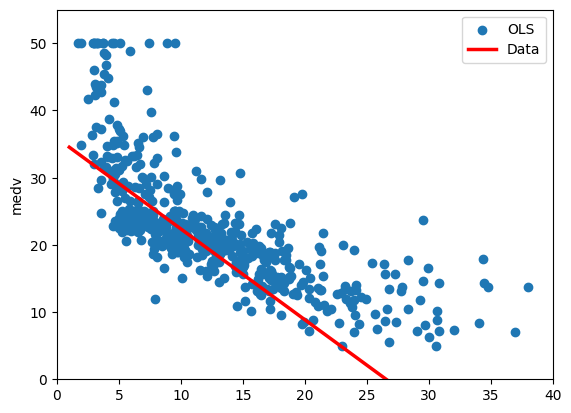

In [39]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,1],y_true)
ax.set_ylabel("medv")
xs = range(int(np.min(X_train[:,1])), int(np.max(X_train[:,1])))
xs = np.array(xs)
xs = sm.add_constant(xs)
ys = np.dot(xs, beta)
ax.plot(xs[:,1], ys, 'r', linewidth=2.5);
ax.legend(["OLS","Data"]);
plt.xlim(0, 40);
plt.ylim(0, 55);